In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/drive/My Drive/Social_Network_Ads_usyia.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

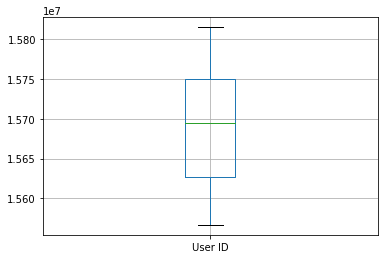

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column=[df.columns[0]])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))
plt.show()

In [ ]:
df[df.columns[0]].value_counts()
#it is found user_ids are unique, so there is no info, so we can drop it

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df.head())
print(df['Gender'].unique())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0
[1 0]


In [ ]:
#also can be done using getdummies
df=pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
df.head

In [ ]:
X=df.drop(["User ID","Purchased"],axis=1)
Y=df['Purchased']

In [ ]:
print("Input for my ML model: \n",X.head())
print("Output for my ML model : \n", Y.head())

Input for my ML model: 
    Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000
Output for my ML model : 
 0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applyting Logistic regression

In [ ]:
#call the model
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()

Applying Decision Tree

In [ ]:
#call the model
from sklearn.tree import DecisionTreeClassifier
lr_model= DecisionTreeClassifier(random_state=0)

playing with decision tree classifiers

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(X_train, Y_train)

Applying Random Forest

In [ ]:
#call the model
#from sklearn.ensemble import RandomForestClassifier
#rf_model= RandomForestClassifier(random_state=0)

In [ ]:
clf = RandomForestClassifier(criterion="gini", max_depth=3)
clf=clf.fit(X_train, Y_train)

In [ ]:
#Fit the model
#clf = lr_model.fit(X_train, Y_train)

In [ ]:
X.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary
0    15624510       1   19            19000
1    15810944       1   35            20000
2    15668575       0   26            43000
3    15603246       0   27            57000
4    15804002       1   19            76000
..        ...     ...  ...              ...
395  15691863       0   46            41000
396  15706071       1   51            23000
397  15654296       0   50            20000
398  15755018       1   36            33000
399  15594041       0   49            36000

[400 rows x 4 columns]>

In [ ]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,y_predicted))
print(classification_report(Y_test,y_predicted))

[[50  4]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.85      0.88      0.87        26

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_predicted))
print('f1_score:', f1_score(Y_test, y_predicted))
print('recall_score:', recall_score(Y_test, y_predicted))
print('precision_score:', precision_score(Y_test, y_predicted))
print('f1_score: {}'.format(f1_score(Y_test, y_predicted)))
#Accuracy: 0.9125
#f1_score: 0.8679245283018868
#recall_score: 0.8846153846153846
#precision_score: 0.8518518518518519
#f1_score: 0.8679245283018868

Accuracy: 0.8
f1_score: 0.6
recall_score: 0.46153846153846156
precision_score: 0.8571428571428571
f1_score: 0.6


Applying SVM

In [ ]:
from sklearn import svm
#calling the model
clf= svm.SVC(kernel='rbf', degree=2)
#fitting the model
clf.fit(X_train,Y_train)
#Predicct the model
y_predicted= clf.predict(X_test)
y_predicted_train= clf.predict(X_train)
print(y_predicted)
print(y_predicted_train)


[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1]
[0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1]


In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_predicted))
print('f1_score:', f1_score(Y_test, y_predicted))
print('recall_score:', recall_score(Y_test, y_predicted))
print('precision_score:', precision_score(Y_test, y_predicted))
print('f1_score: {}'.format(f1_score(Y_test, y_predicted)))

Accuracy: 0.8
f1_score: 0.6
recall_score: 0.46153846153846156
precision_score: 0.8571428571428571
f1_score: 0.6


In [ ]:
print('Accuracy:', accuracy_score(Y_train, y_predicted_train))
print('f1_score:', f1_score(Y_train, y_predicted_train))
print('recall_score:', recall_score(Y_train, y_predicted_train))
print('precision_score:', precision_score(Y_train, y_predicted_train))

Accuracy: 0.759375
f1_score: 0.5599999999999999
recall_score: 0.4188034188034188
precision_score: 0.8448275862068966


In [ ]:
#importing necessary packages
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn import tree

Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')  # here k=3
model.fit(X_train,Y_train)

y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_predicted))
print('f1_score:', f1_score(Y_test, y_predicted))
print('recall_score:', recall_score(Y_test, y_predicted))
print('precision_score:', precision_score(Y_test, y_predicted))

Accuracy: 0.825
f1_score: 0.7083333333333333
recall_score: 0.6538461538461539
precision_score: 0.7727272727272727


In [ ]:
print('Accuracy:', accuracy_score(Y_train, y_predicted_train))
print('f1_score:', f1_score(Y_train, y_predicted_train))
print('recall_score:', recall_score(Y_train, y_predicted_train))
print('precision_score:', precision_score(Y_train, y_predicted_train))

Accuracy: 0.865625
f1_score: 0.8071748878923767
recall_score: 0.7692307692307693
precision_score: 0.8490566037735849


Applying Naive Baye's

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_predicted = gnb.predict(X_test)
y_predicted_train = gnb.predict(X_train)

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_predicted))
print('f1_score:', f1_score(Y_test, y_predicted))
print('recall_score:', recall_score(Y_test, y_predicted))
print('precision_score:', precision_score(Y_test, y_predicted))

Accuracy: 0.875
f1_score: 0.8
recall_score: 0.7692307692307693
precision_score: 0.8333333333333334


In [ ]:
print('Accuracy:', accuracy_score(Y_train, y_predicted_train))
print('f1_score:', f1_score(Y_train, y_predicted_train))
print('recall_score:', recall_score(Y_train, y_predicted_train))
print('precision_score:', precision_score(Y_train, y_predicted_train))

Accuracy: 0.9
f1_score: 0.8596491228070176
recall_score: 0.8376068376068376
precision_score: 0.8828828828828829


1. Scaling
2. rf and dt model parameters on accuracy, precision and recall
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://www.datacamp.com/community/tutorials/decision-tree-classification-python